In [17]:
import pandas as pd
import numpy as np
# import streamlit as st
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [36]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [19]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [20]:
# FEATURE ENGINEERING

df = data.copy()
df['Income Category'] = df['Income_Category'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
df['Income Category'] = df['Income Category'].astype(float) # .................. Turn the new column to a numerical datatype
df.drop(['CLIENTNUM', 'Income_Category'], axis = 1, inplace = True) # .......... Drop the columns we dont need
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,Existing Customer,45,M,3,High School,Married,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,Existing Customer,49,F,5,Graduate,Single,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,Existing Customer,51,M,3,Graduate,Married,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,Existing Customer,40,F,4,High School,Unknown,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,Existing Customer,40,M,3,Uneducated,Married,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


In [21]:

# Check if the DEPENDENTS column has been identified into its right datatype
categoricals = df.select_dtypes(include = ['object', 'category'])
numericals = df.select_dtypes(include = 'number')

print(f"\t\tCategorical Columns")
display(categoricals.head())
print(f"\n\t\tNumerical Columns")
display(numericals.head())

		Categorical Columns


,Attrition_Flag,Gender,Education_Level,Marital_Status,Card_Category
0,Existing Customer,M,High School,Married,Blue
1,Existing Customer,F,Graduate,Single,Blue
2,Existing Customer,M,Graduate,Married,Blue
3,Existing Customer,F,High School,Unknown,Blue
4,Existing Customer,M,Uneducated,Married,Blue



		Numerical Columns


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,60.0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40.0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,80.0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40.0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,60.0


In [22]:
# Clean the newly created column
df['Income Category'].fillna(df['Income Category'].median(), inplace = True)

In [23]:
# PREPROCESSSING
# Standardization
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

for i in numericals.columns: # ................................................. Select all numerical columns
    if i in df.columns: # ...................................................... If the selected column is found in the general dataframe
        df[i] = scaler.fit_transform(df[[i]]) # ................................ Scale it

for i in categoricals.columns: # ............................................... Select all categorical columns
    if i in df.columns: # ...................................................... If the selected columns are found in the general dataframe
        df[i] = encoder.fit_transform(df[i])# .................................. encode it

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income Category
0,1,-0.165406,1,0.503368,3,1,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0.232404
1,1,0.333570,0,2.043199,2,2,0,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,-0.624369
2,1,0.583058,1,0.503368,2,1,0,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,1.089178
3,1,-0.789126,0,1.273283,3,3,0,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-0.624369
4,1,-0.789126,1,0.503368,5,1,0,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,0.232404


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

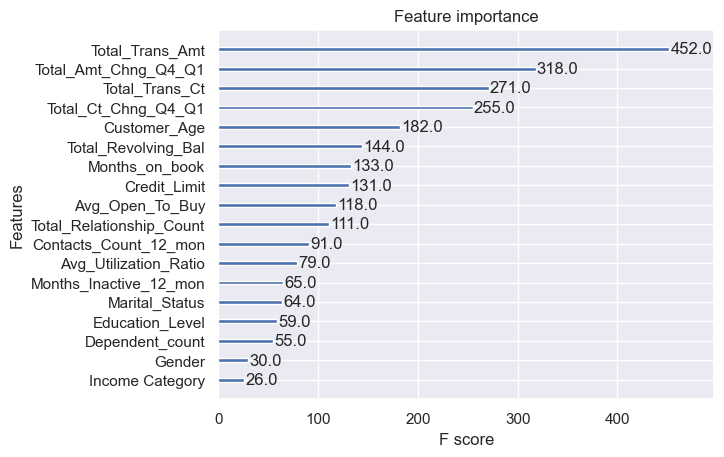

In [24]:
# FEATURE SELECTION

x = df.drop('Attrition_Flag', axis = 1)
y = df['Attrition_Flag']

# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [25]:
sel_cols = ['Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Customer_Age', 'Total_Revolving_Bal', 'Months_on_book']
x = df[sel_cols]
x.head()

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Customer_Age,Total_Revolving_Bal,Months_on_book
0,-0.959707,2.623494,-0.973895,3.834003,-0.165406,-0.473422,0.384621
1,-0.916433,3.563293,-1.357340,12.608573,0.333570,-0.366667,1.010715
2,-0.740982,8.367214,-1.911206,6.807864,0.583058,-1.426858,0.008965
3,-0.951758,2.942843,-1.911206,6.807864,-0.789126,1.661686,-0.241473
4,-1.056263,6.455682,-1.570365,7.509325,-0.789126,-1.426858,-1.869317


<Axes: xlabel='Attrition_Flag', ylabel='count'>

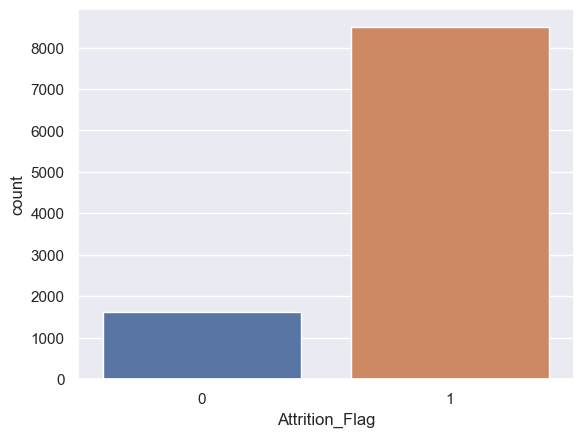

In [26]:
sns.set(style = 'darkgrid')
sns.countplot(x = y)

,Total_Trans_Amt,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Customer_Age,Total_Revolving_Bal,Months_on_book,Attrition_Flag
3567,-0.256137,0.743898,0.346860,1.826226,1.206778,-0.548274,0.008965,1
1235,-0.864327,-0.852847,-0.888685,0.200684,0.084082,0.487376,0.384621,1
6539,0.020876,0.164507,0.048625,-0.084941,0.458314,0.805188,-1.869317,1
3466,0.256086,-0.802664,0.048625,-0.429372,-0.165406,1.149996,0.008965,1
8929,1.191039,0.479294,1.071146,-0.559583,-0.290150,0.600267,-0.241473,1
...,...,...,...,...,...,...,...,...
10119,0.472456,-2.709633,-0.505240,-0.832607,1.082034,1.661686,1.386371,0
10123,1.283475,0.201004,0.176440,-0.122745,-0.664382,1.255524,-1.368442,0
10124,1.732994,0.269436,-0.207005,0.444305,-0.290150,-1.426858,0.008965,0
10125,1.174848,-1.026208,-0.121795,0.041070,-2.036565,-1.426858,0.008965,0


<Axes: xlabel='Attrition_Flag', ylabel='count'>

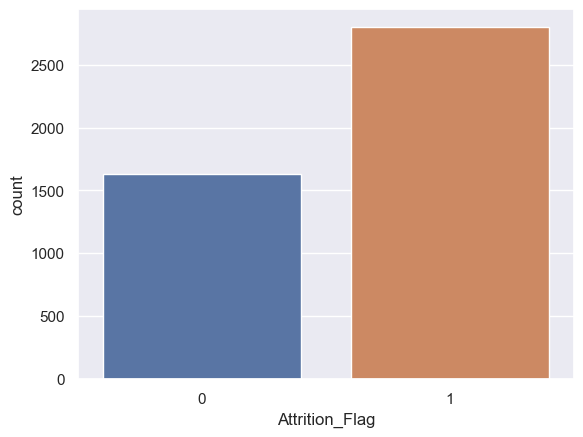

In [27]:
# UnderSampling The Majority Class
dx = pd.concat([x, y], axis =1) # .............................................. create a new dataframe with x and y
class1 = dx.loc[dx['Attrition_Flag'] == 1] # ................................... select attrition flag that is only 1
class0 = dx.loc[dx['Attrition_Flag'] == 0] # ................................... select attrition flag that is only 0

class1_3000 = class1.sample(2800) # ............................................ randomly select 2800 rows from majority class 1

new_dataframe = pd.concat([class1_3000, class0], axis = 0) # ................... join the new data of class 1 and class 0 together along the rows
display(new_dataframe)
sns.countplot(x = new_dataframe['Attrition_Flag'])

In [28]:
perc1 = len(new_dataframe.loc[new_dataframe['Attrition_Flag'] == 1]) / len(new_dataframe) * 100
perc0 = len(new_dataframe.loc[new_dataframe['Attrition_Flag'] == 0]) / len(new_dataframe) * 100
print(f"Ratio Of distribution is 1 and 0 is {round(perc1)}:{round(perc0)}")

Ratio Of distribution is 1 and 0 is 63:37


In [29]:
#modelling
x = new_dataframe.drop('Attrition_Flag', axis = 1)
y = new_dataframe['Attrition_Flag']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 9, stratify = y)

In [31]:
algorithms = ['RandomForestClassifier', 'DecisionTreeClassifier', 'SVMClassifier', 'XGBoostClassifier', 'LogisticRegression']

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [33]:
# Modelling
model = RandomForestClassifier() 
model.fit(xtrain, ytrain) 
cross_validation = model.predict(xtrain)
pred = model.predict(xtest) 

<Axes: xlabel='Attrition_Flag', ylabel='count'>

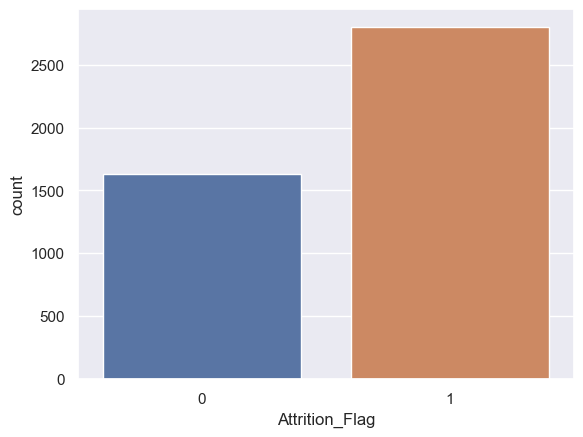

In [34]:
sns.countplot(x = y)

In [35]:
model = pickle.dump(model, open('BankChurners.pkl', 'wb'))
print('\nModel is saved\n')


Model is saved

